In [31]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from sklearn.preprocessing import *
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
"""
1. binomial distribution
np.random.binomial(n, p, size)

2. hypergeometric distribution
np.random.hypergeometric(ngood, nbad, nsample, size)

3. poisson distribution
np.random.poisson(lam, size)

4. normal distribution
np.random.normal(loc, scale, size)

5. t distribution
np.random.standard_t(df, size)

6. uniform distribution
np.random.uniform(low, high, size)

7. f distribution
np.random.f(dfnum, dfden, size)
"""

In [29]:
# random sampling from binomial
# 앞 뒤(n=1), 확률 50% 동전 던지기 20번

x = np.random.binomial(n=1, p=0.5, size=20)
x

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [118]:
rv = stats.binom(n=20, p=0.5)
rv.pmf(12)

0.12013435363769531

In [39]:
# random sampling from hypergeometric
# good = 5개, bad=20개인 모집단에서 5개의 샘플을 무작위로 비복원추출
# 100번 시뮬레이션
np.random.seed(100)
x = np.random.hypergeometric(ngood=5, nbad=20, nsample=5, size=100)
x

array([1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 3, 2,
       0, 0, 0, 1, 3, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 0])

In [49]:
unique, count = np.unique(x, return_counts=True)
np.asarray([unique, count]).T

array([[ 0, 27],
       [ 1, 53],
       [ 2, 16],
       [ 3,  4]], dtype=int64)

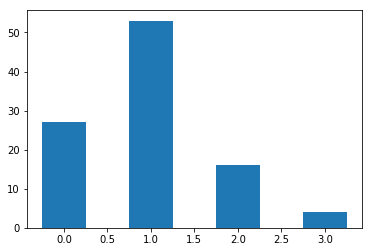

In [55]:
# plotting bar
plt.bar(left=unique, height=count, width=0.5)
plt.show()

In [108]:
"""
문제) 어떤 바리스타가 아메리카노 향 냄새를 맡아보기만 하면
 "콜롬비아 원두"로 만든 것인지 아닌지를 맞출 수 있다고 주장하였다고 합니다.  
 그래서 그 바리스타를 데려다가 실험을 해보았습니다.  
 "콜롬비아 원두"로 만든 아메리카노 5잔 (m=5), 
콜롬비아 원두 말고 다른 지역 원두로 만든 아메리카노 20잔 (n=20) 을
만들어 놓고 그 바리스타에게 "콜롬비아 원두"로 만든 아메리카노 5잔을 
골라내 보라고 시켰습니다.  
이때 "콜롬비아 원두"로 만든 아메리카노를 4잔 골라낼 확률은?


"""


In [108]:
# M = 25(총 커피수), n=5(콜롬비아원두), N=5(5개 추출)
rv = stats.hypergeom(M=25, n=5, N=5)
rv.pmf(4)

0.0018821757952192761

In [ ]:
"""
문제 2) TV를 생산하는 제조회사에서 생산한 TV 100 대 중에서
품질이 양호한 TV가 95대, 불량품이 5대가 재고창고에 들어있다고 합니다.
이 재고 창고에서 TV 10개를 비복원추출한다고 했을 때 
불량품이 3개가 포함되어 있을 확률은?
"""

In [109]:
# M = 100(총100대) n=5(불량품 수), N=10(10개 추출)
rv = stats.hypergeom(M=100, n=5, N=10)
rv.pmf(3)

0.006383528106650326

In [119]:
# random sampling from poisson
# 사건의 평균 회수(lamda)=20
np.random.seed(100)
x = np.random.poisson(lam=20, size=100)
x

array([21, 19, 22, 14, 26, 15, 25, 25, 19, 25, 15, 24, 21, 13, 26, 23, 21,
       16, 24, 17, 18, 18, 15, 18, 22, 28, 21, 18, 17, 31, 23, 13, 20, 19,
       24, 17, 20, 13, 19, 16, 16, 21, 16, 21, 19, 20, 20, 19, 19, 20, 13,
       29,  9, 13, 20, 29, 15, 15, 21, 20, 21, 18, 16, 20, 23, 18, 22, 14,
       19, 20, 18, 17, 20, 24, 20, 15, 19, 19, 25, 17, 19, 27, 20, 17, 12,
       22, 16, 23, 17, 11, 15, 19, 16, 21, 21, 25, 26, 23, 15, 25])

In [121]:
unique, count = np.unique(x, return_counts=True)
np.array([unique, count]).T

array([[ 9,  1],
       [11,  1],
       [12,  1],
       [13,  5],
       [14,  2],
       [15,  8],
       [16,  7],
       [17,  7],
       [18,  7],
       [19, 12],
       [20, 12],
       [21, 10],
       [22,  4],
       [23,  5],
       [24,  4],
       [25,  6],
       [26,  3],
       [27,  1],
       [28,  1],
       [29,  2],
       [31,  1]], dtype=int64)

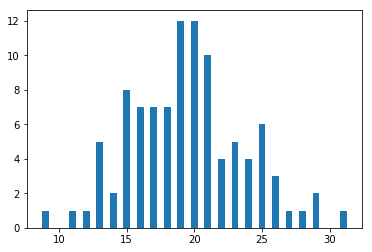

In [125]:
plt.bar(left=unique, height=count, width=0.5)
plt.show()

In [ ]:
"""
문제)  어느 은행의 1시간 당 방문 고객 수가 λ = 20 인 
포아송 분포를 따른다고 한다.  그럼 1시간 당 방문고객수가 15명일 확률은?
"""


In [130]:
rv = stats.poisson(20)
rv.pmf(15)

0.051648853531758139

In [ ]:
"""
문제)  어느 은행의 1시간 당 방문 고객 수가 λ = 20 인 
포아송 분포를 따른다고 한다.  
그럼 1시간 당 방문고객수가 15명 이하일 확률은?
"""

In [147]:
i = 0
result = 0
while i <= 15:
    result += rv.pmf(i)
    i+=1

print(result)
print(rv.cdf(15))

0.15651313464
0.15651313464


In [161]:
"""
문제) 어느 은행의 1시간 당 방문 고객 수가 λ = 20 인 
포아송 분포를 따른다고 한다.  
만약 1시간 동안 방문한 고객수에 해당하는 확률이 15.65131% 이라면 
이는 몇 명에 해당하는가?

"""

In [161]:
stats.poisson.ppf(q=0.1565131, mu=20)

15.0

In [162]:
# random sampling from normal
# mu = 0, sigma = 3
np.random.seed(100)
x = np.random.normal(loc=0, scale=3, size=100)
x

array([-5.24929642,  1.02804121,  3.45910741, -0.75730811,  2.94396236,
        1.54265652,  0.66353901, -3.21012999, -0.56848749,  0.76500433,
       -1.37408096,  1.30549046, -1.75078515,  2.45054122,  2.01816242,
       -0.31323343, -1.59384113,  3.08919806, -1.31440687, -3.35495474,
        4.85694498,  4.62481552, -0.75563742, -2.52730721,  0.55355607,
        2.8112466 ,  2.19300103,  4.08466838, -0.97871418,  0.16702804,
        0.66719883, -4.32965099, -2.26905692,  2.44936203,  2.25133428,
       -1.36784078,  3.5688668 , -5.07185048, -4.06919715, -3.69730354,
       -1.63331749, -2.00451521,  0.02194369, -1.83881621,  3.89924422,
       -5.19928687, -2.9499303 ,  1.07252326, -4.84073551,  4.4121416 ,
       -3.56405279, -1.64923858, -2.82013848, -2.48379709,  0.3265904 ,
        1.52342877, -2.58668204,  3.74840923, -0.23883374, -2.66919444,
       -2.64539517,  0.05591685,  0.71353387,  0.04064565, -4.9065882 ,
       -3.13262963,  1.83911665,  2.20861564,  3.08076432, -4.29

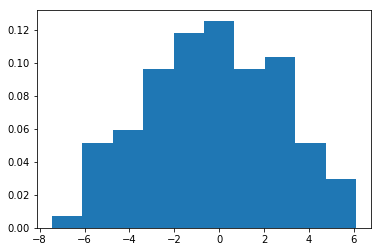

In [165]:
# plotting hist
# normed = True : percentage
plt.hist(x, normed=True)
plt.show()

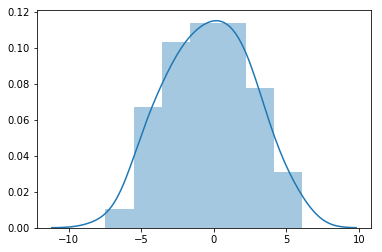

In [167]:
sns.distplot(x)
plt.show()

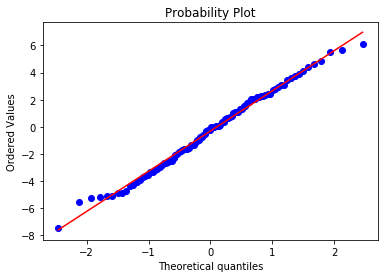

In [168]:
# qqplot
stats.probplot(x, plot=plt)
plt.show()

In [169]:
# normality test
stats.shapiro(x)
# 0.6603으로 귀무가설 채택
# 정규분포를 따른다

(0.9899469614028931, 0.660305917263031)

In [190]:
# random sampling t 
# degree of freedom : 3
np.random.seed(100)
x = np.random.standard_t(df=3, size=100)
x

array([-1.70633623,  0.61010003,  0.45753218, -0.85709656, -0.42990712,
       -0.7437467 ,  0.8444005 , -0.4040428 ,  2.13905276, -0.10844638,
        0.67238716,  1.88720362, -2.57340231, -0.69724955, -3.40107659,
       -0.57745433, -0.36487447,  3.95862541,  2.34665412, -0.94310449,
        0.81852816, -0.48391289,  0.01380029, -0.43003718, -2.25784604,
       -0.18216847, -1.21433582,  0.46347964,  0.50024665, -1.1595865 ,
        0.02358778, -1.18879826, -0.38767689,  2.24289791, -2.80798472,
       -2.838893  , -0.39222432, -1.61499121, -1.78498184,  0.44618923,
       -1.5181203 ,  5.44389927,  4.17743903, -0.49617121, -0.02996529,
        0.89595015,  1.14860485, -3.16541308,  0.14279246,  0.83121743,
       -0.32403947,  0.59297222, -0.39750861,  0.57634934,  0.81587478,
       -1.29367024, -0.28580516, -0.48422765, -0.83697192,  0.50702557,
       -1.98915687,  2.92965716, -1.19522074,  0.65511251,  2.12055605,
       -0.03640814, -0.41931018,  3.31199804, -0.61725596,  0.79

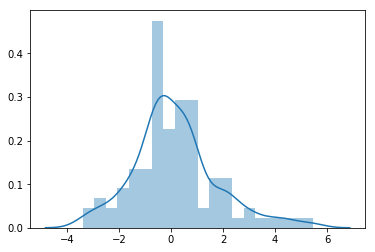

In [199]:
sns.distplot(x, bins=20, norm_hist=True)
plt.show()

In [210]:
# random sampling from uniform
# min:0, max:10
np.random.seed(100)
x = np.random.uniform(low=0, high=10, size=100)
x

array([ 5.43404942,  2.78369385,  4.24517591,  8.44776132,  0.04718856,
        1.21569121,  6.70749085,  8.25852755,  1.3670659 ,  5.75093329,
        8.91321954,  2.09202122,  1.8532822 ,  1.0837689 ,  2.19697493,
        9.78623785,  8.11683149,  1.71941013,  8.16224749,  2.74073747,
        4.31704184,  9.4002982 ,  8.17649379,  3.3611195 ,  1.75410454,
        3.72832046,  0.05688507,  2.52426353,  7.95662508,  0.15254971,
        5.98843377,  6.03804539,  1.05147685,  3.81943445,  0.36476057,
        8.90411563,  9.80920857,  0.59941989,  8.90545945,  5.76901499,
        7.42479689,  6.30183936,  5.81842192,  0.20439132,  2.10026578,
        5.44684878,  7.69115171,  2.50695229,  2.8589569 ,  8.52395088,
        9.75006494,  8.84853293,  3.59507844,  5.98858946,  3.54795612,
        3.40190215,  1.7808099 ,  2.37694209,  0.44862282,  5.0543143 ,
        3.76252454,  5.92805401,  6.29941876,  1.42600314,  9.33841299,
        9.46379881,  6.02296658,  3.8776628 ,  3.63188004,  2.04

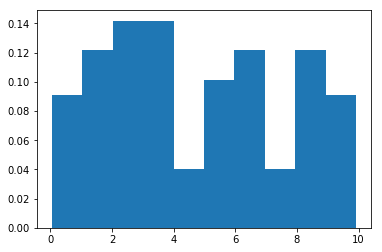

In [214]:
plt.hist(x, bins=10, normed=True)
plt.show()


In [215]:
# random sampling from discrete uniform
# 0-10 까지 정수형 난수 만들기
np.random.seed(100)
x = np.random.randint(low=0, high=11, size=100)
x

array([ 8,  8,  3,  7,  7,  0, 10,  4,  2,  5,  2,  2,  2,  1,  0,  8,  4,
       10,  0,  9,  6,  2,  4,  1,  5,  3,  4,  4,  3,  7,  1,  1,  7,  7,
        0,  2,  9,  9,  3,  2,  5,  8,  1,  0,  7,  6,  2,  0,  8,  2,  5,
       10,  1,  8, 10,  1,  5,  4,  2,  8,  3,  5,  0,  9, 10,  3,  6,  3,
        4, 10,  7,  6,  3,  9,  0,  4,  4,  5,  7,  6,  6,  2, 10,  4,  2,
        7,  1, 10,  6, 10,  6,  0, 10,  7,  2,  3,  5,  4,  2,  4])

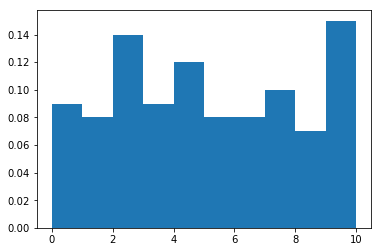

In [217]:
plt.hist(x, bins=10, normed=True)
plt.show()

In [234]:
# random sampling from F
# df1 = 5, df2 = 10
np.random.seed(100)
x = np.random.f(dfnum=5, dfden=10, size=100)
x

array([ 0.17509245,  1.34830314,  0.7250835 ,  0.55013536,  1.49183341,
        1.19802261,  1.24949706,  0.70015548,  0.71890936,  0.37020715,
        4.70371284,  0.86726338,  5.12146941,  0.12848202,  0.68237285,
        0.79663258,  1.36935299,  1.08005188,  0.99311831,  0.15607878,
        3.7778542 ,  2.35609305,  0.16850985,  0.98599364,  1.12567067,
        3.21579679,  0.87982087,  0.38319493,  0.96834789,  1.00428004,
        1.65589171,  1.2581278 ,  1.71881244,  0.11251552,  1.65949951,
        1.15809569,  1.33210756,  0.37989215,  0.252446  ,  1.22409406,
        1.86571485,  0.42345727,  3.52740557,  1.32989807,  2.0095314 ,
        1.20016474,  3.5067706 ,  0.67232354,  2.79268109,  0.38115844,
        1.3978449 ,  0.7089553 ,  2.12685211,  0.73462708,  2.03686026,
        0.50287078,  0.31183315,  1.66994305,  5.36906534,  1.55708073,
        2.66826698,  1.31701804,  0.66126086,  0.19123589,  0.58223398,
        0.41897952,  2.17842598,  0.98481411,  0.46953552,  0.99

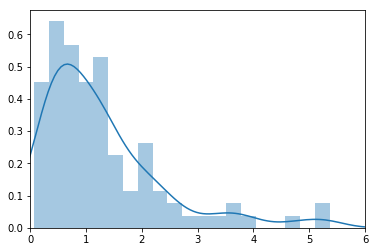

In [236]:
sns.distplot(x, bins=20)
plt.xlim(0, 6)
plt.show()

In [227]:
# random sampling from chi-squared
# df = 2
np.random.seed(100)
x = np.random.chisquare(df=2, size=100)
x

array([  1.56791674e+00,   6.52483769e-01,   1.10509323e+00,
         3.72577379e+00,   9.46005029e-03,   2.59236110e-01,
         2.22187032e+00,   3.49570821e+00,   2.94001314e-01,
         1.71177147e+00,   4.43873095e+00,   4.69425742e-01,
         4.09939940e-01,   2.29423517e-01,   4.96147209e-01,
         7.69095282e+00,   3.33925872e+00,   3.77341773e-01,
         3.38808346e+00,   6.40613699e-01,   1.13022638e+00,
         5.62781567e+00,   3.40364791e+00,   8.19283487e-01,
         3.85739072e-01,   9.33081811e-01,   1.14094971e-02,
         5.81844910e-01,   3.17596456e+00,   3.07450508e-02,
         1.82680669e+00,   1.85169520e+00,   2.22193172e-01,
         9.62350625e-01,   7.43158820e-02,   4.42204683e+00,
         7.91831906e+00,   1.23627383e-01,   4.42450081e+00,
         1.72030053e+00,   2.71331337e+00,   1.98949905e+00,
         1.74379278e+00,   4.13018033e-02,   4.71511953e-01,
         1.57353105e+00,   2.93167254e+00,   5.77218949e-01,
         6.73452471e-01,

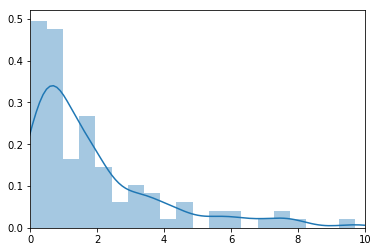

In [231]:
sns.distplot(x, bins=20)
plt.xlim(0, 10)
plt.show()